# Analisi dati del pendolo usando il ML.
L'analisi dei dati verrà svolta supponendo di non conoscere la legge fisica del periodo del **pendolo semplice**. 

Dopo aver svolto tutta l'analisi si confronterà il risultato trivato con la nota legge.
Lettura del dataset e salvataggio in un dataframe

In [92]:
import pandas as pd

df = pd.read_csv('dataset_pendolo.csv') 
df.head()

,Periodo (s),Lunghezza (m),Massa (kg),Angolo (deg)
0,1.716,0.8,0.2668,10
1,1.676,0.8,0.2668,10
2,1.673,0.8,0.2668,10
3,1.695,0.8,0.2668,10
4,1.733,0.8,0.2668,10


In [93]:
print(df.shape)
df.isnull().sum()

(1584, 4)


Periodo (s)      0
Lunghezza (m)    0
Massa (kg)       0
Angolo (deg)     0
dtype: int64

Il nostro dataset ha 1120 samples e 3 features originali a cui aggiungiamo l'angolo in radianti, il target è il Periodo.

Notiamo che tutte le grandezze sono di tipo quantitativo e non indicano categorie, inoltre usano come unità di misura quella del *SI*, tranne per gli angoli che dovremmo convertire successivamente. 

In [94]:
import math
df['Angolo (rad)']=df['Angolo (deg)']*math.pi/180

# Exploratory data analysis (EDA)
Rappresentazione di un istogramma e del plot periodo - feature per ogni grandezza

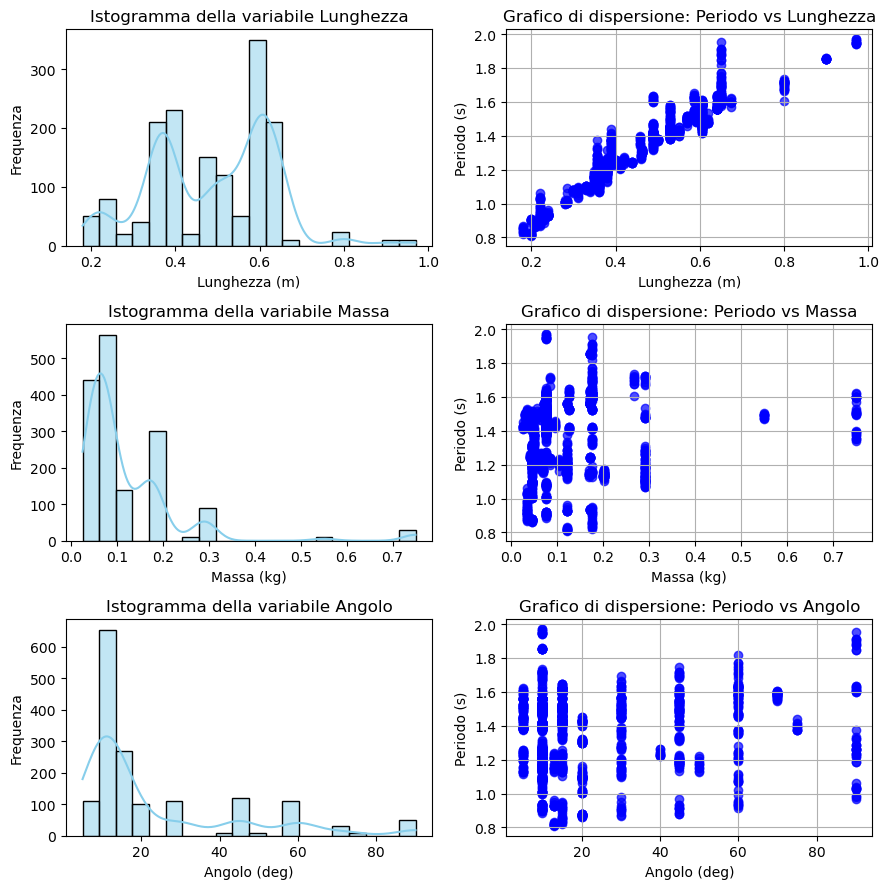

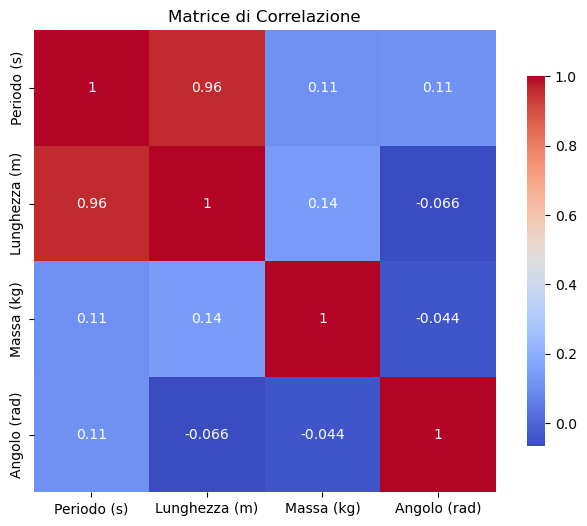

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3, 2, figsize=(9, 9))

sns.histplot(df['Lunghezza (m)'], bins=20, kde=True, color='skyblue', ax=axes[0,0])
axes[0,0].set_xlabel('Lunghezza (m)')
axes[0,0].set_ylabel('Frequenza')
axes[0,0].set_title('Istogramma della variabile Lunghezza')

axes[0,1].scatter(df['Lunghezza (m)'], df['Periodo (s)'], color='b', alpha=0.7)
axes[0,1].set_xlabel('Lunghezza (m)')
axes[0,1].set_ylabel('Periodo (s)')
axes[0,1].set_title('Grafico di dispersione: Periodo vs Lunghezza')
axes[0,1].grid(True)


sns.histplot(df['Massa (kg)'], bins=20, kde=True, color='skyblue', ax=axes[1,0])
axes[1,0].set_xlabel('Massa (kg)')
axes[1,0].set_ylabel('Frequenza')
axes[1,0].set_title('Istogramma della variabile Massa')

axes[1,1].scatter(df['Massa (kg)'], df['Periodo (s)'], color='b', alpha=0.7)
axes[1,1].set_xlabel('Massa (kg)')
axes[1,1].set_ylabel('Periodo (s)')
axes[1,1].set_title('Grafico di dispersione: Periodo vs Massa')
axes[1,1].grid(True)


sns.histplot(df['Angolo (deg)'], bins=20, kde=True, color='skyblue', ax=axes[2,0])
axes[2,0].set_xlabel('Angolo (deg)')
axes[2,0].set_ylabel('Frequenza')
axes[2,0].set_title('Istogramma della variabile Angolo')

axes[2,1].scatter(df['Angolo (deg)'], df['Periodo (s)'], color='b', alpha=0.7)
axes[2,1].set_xlabel('Angolo (deg)')
axes[2,1].set_ylabel('Periodo (s)')
axes[2,1].set_title('Grafico di dispersione: Periodo vs Angolo')
axes[2,1].grid(True)


plt.tight_layout()
plt.show()


# Calcola la matrice di correlazione
correlation_matrix = df[['Periodo (s)', 'Lunghezza (m)', 'Massa (kg)', 'Angolo (rad)']].corr()

# Visualizza la matrice di correlazione con una heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title("Matrice di Correlazione")
plt.show()

Osservando i grafici del primo gruppo e la matrice di correlazione notiamo che la grandezza che influenza il periodo è sopratturro la **lunghezza** per quanto riguarda la massa e l'angolo i coefficienti di correlazione sono molto bassi, questo suggerisce che queste due grandezze potrebbero essere trascurate in una prima analisi. Merita attenzione lo scatter periodo angoli in quanto mette in evidenza come per angoli al di sotto dei 20° sembra non esserci alcuna correlazione tra l'angolo e il periodo ma questo sembra cambiare al di sopra di questo valore, in particolare più grande è l'angolo più sembra ci sia una certa regolarità nel periodo. Per sicurezza facciamo due scatterplot per angoli più piccoli di 20° e per angoli più grandi di 20° e anche i corrispondenti grafici periodo lunghezza.

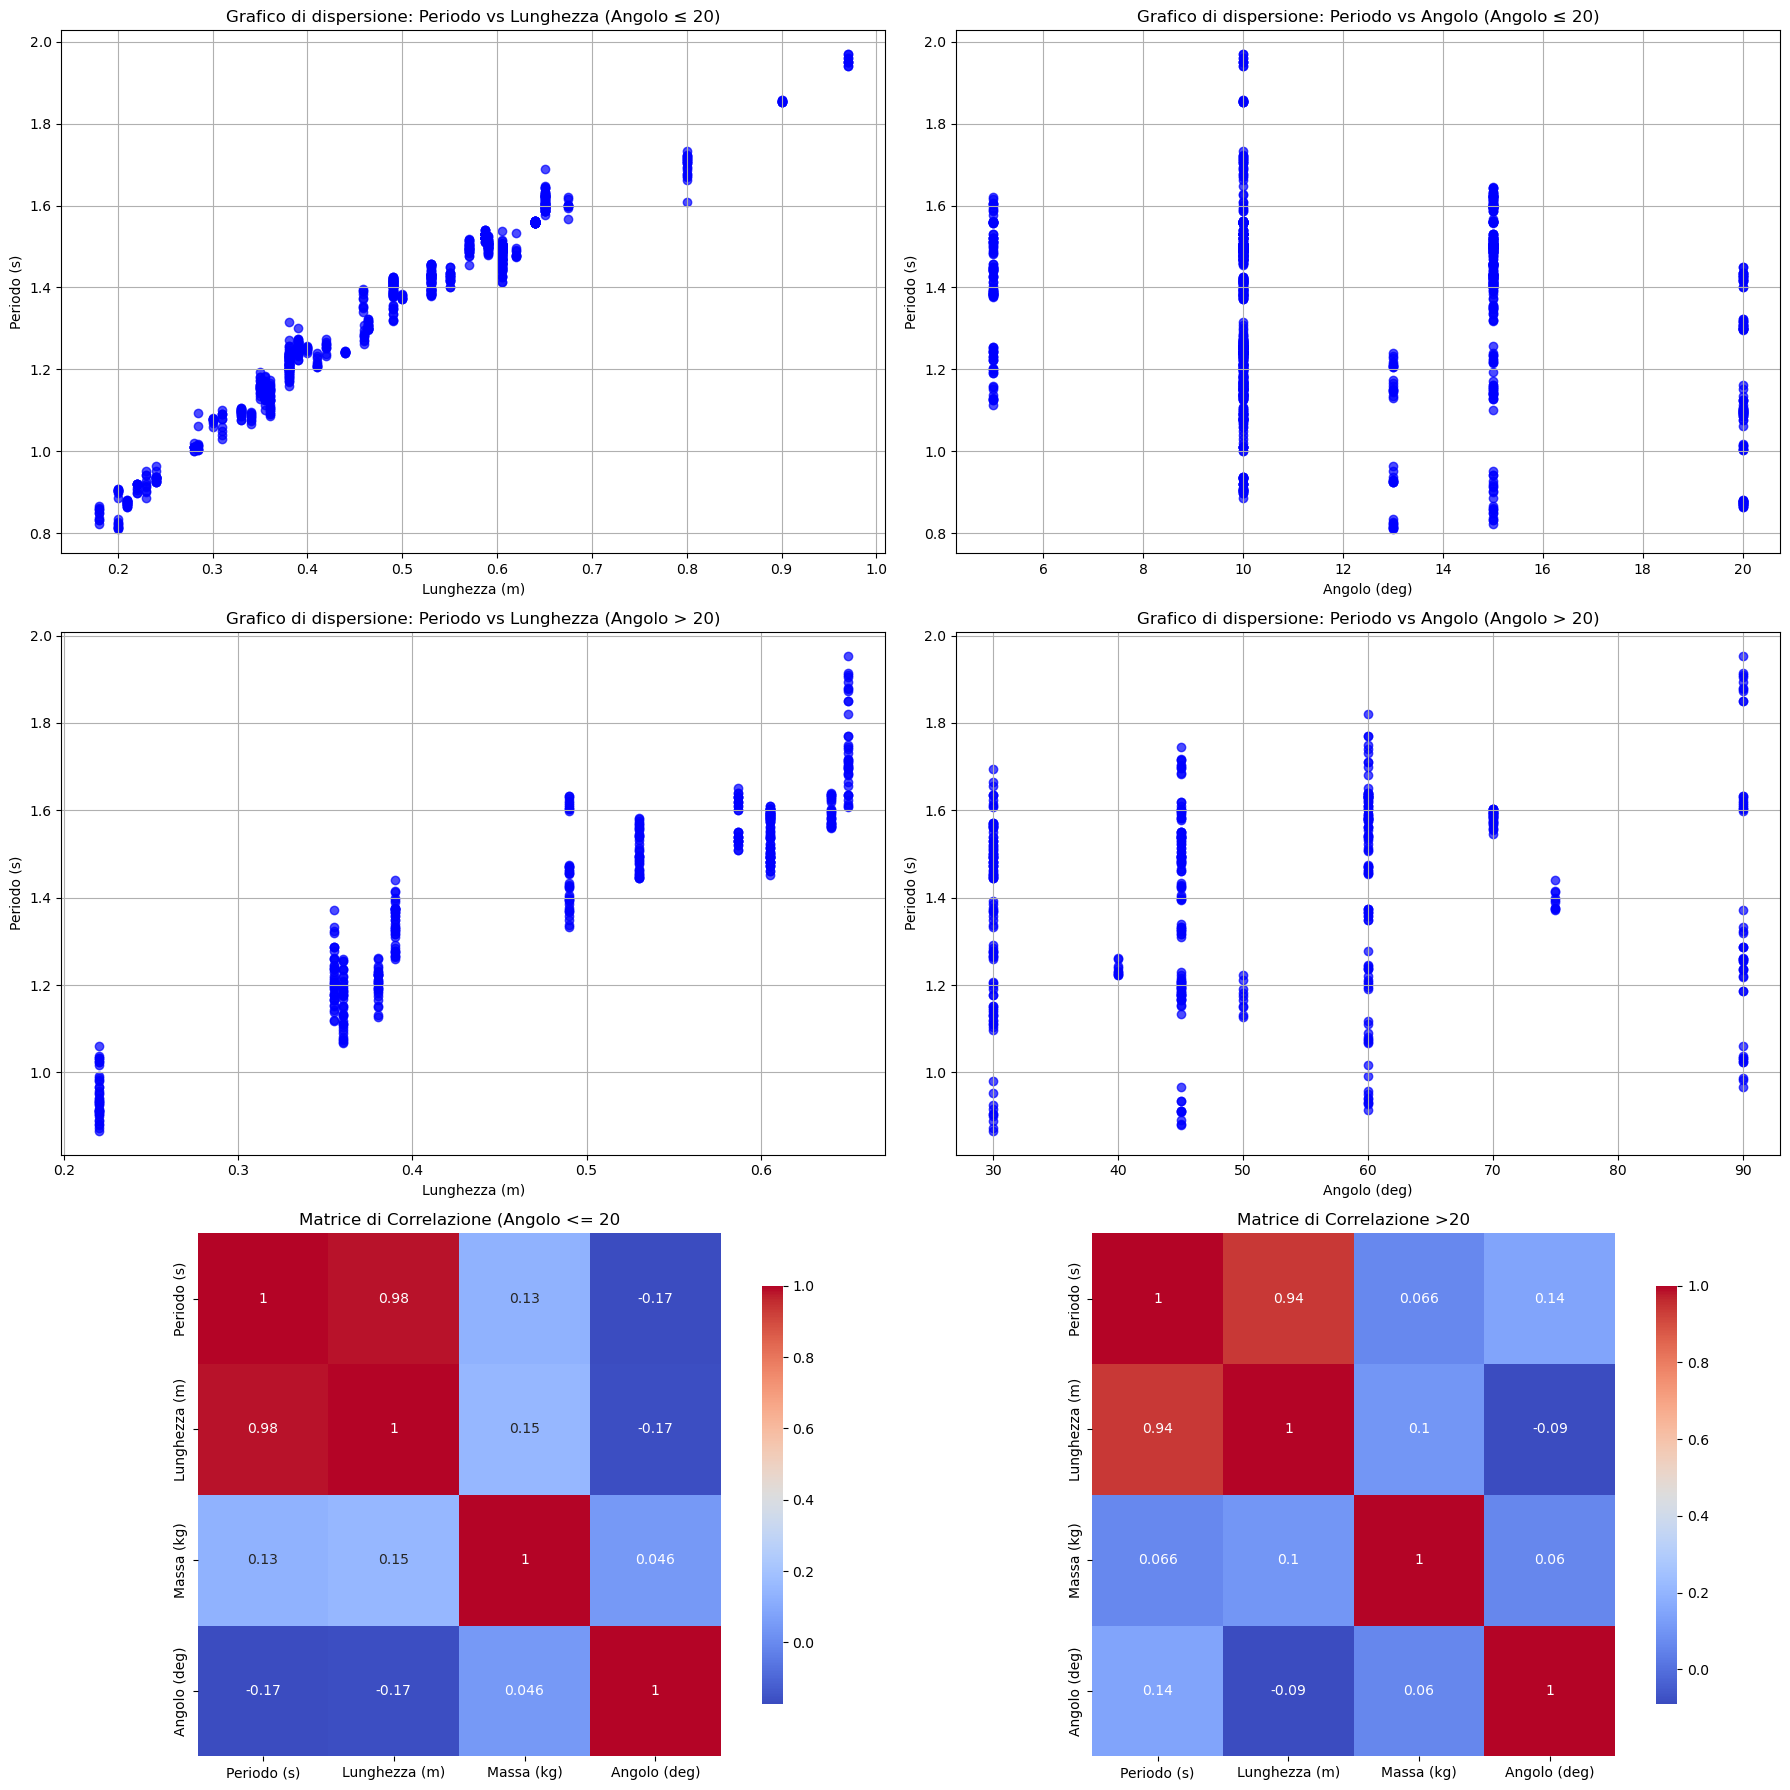

In [96]:
# Filtro per selezionare solo le entry con Angolo <= 20
filtered_df = df[df['Angolo (deg)'] <= 20]

# Creazione del grafico di dispersione Periodo vs Lunghezza 
fig, axes = plt.subplots(3, 2, figsize=(18, 18))
axes[0,0].scatter(filtered_df['Lunghezza (m)'], filtered_df['Periodo (s)'], color='b', alpha=0.7)
axes[0,0].set_xlabel('Lunghezza (m)')
axes[0,0].set_ylabel('Periodo (s)')
axes[0,0].set_title('Grafico di dispersione: Periodo vs Lunghezza (Angolo ≤ 20)')
axes[0,0].grid(True)

# Creazione del grafico di dispersione Periodo vs Angolo
axes[0,1].scatter(filtered_df['Angolo (deg)'], filtered_df['Periodo (s)'], color='b', alpha=0.7)
axes[0,1].set_xlabel('Angolo (deg)')
axes[0,1].set_ylabel('Periodo (s)')
axes[0,1].set_title('Grafico di dispersione: Periodo vs Angolo (Angolo ≤ 20)')
axes[0,1].grid(True)

# Filtro per selezionare solo le entry con Angolo > 20
opposite_df = df[~(df['Angolo (deg)'] <= 20)]
# Creazione del grafico di dispersione Periodo vs Lunghezza 
axes[1,0].scatter(opposite_df['Lunghezza (m)'], opposite_df['Periodo (s)'], color='b', alpha=0.7)
axes[1,0].set_xlabel('Lunghezza (m)')
axes[1,0].set_ylabel('Periodo (s)')
axes[1,0].set_title('Grafico di dispersione: Periodo vs Lunghezza (Angolo > 20)')
axes[1,0].grid(True)

# Creazione del grafico di dispersione Periodo vs Angolo
axes[1,1].scatter(opposite_df['Angolo (deg)'], opposite_df['Periodo (s)'], color='b', alpha=0.7)
axes[1,1].set_xlabel('Angolo (deg)')
axes[1,1].set_ylabel('Periodo (s)')
axes[1,1].set_title('Grafico di dispersione: Periodo vs Angolo (Angolo > 20)')
axes[1,1].grid(True)

# Calcola la matrice di correlazione
correlation_matrix_1 = filtered_df[['Periodo (s)', 'Lunghezza (m)', 'Massa (kg)', 'Angolo (deg)']].corr()
correlation_matrix_2 = opposite_df[['Periodo (s)', 'Lunghezza (m)', 'Massa (kg)', 'Angolo (deg)']].corr()

# Visualizza la matrice di correlazione con una heatmap
sns.heatmap(correlation_matrix_1, annot=True, cmap='coolwarm', square=True, cbar_kws={"shrink": .8}, ax=axes[2,0])
axes[2,0].set_title("Matrice di Correlazione (Angolo <= 20")
sns.heatmap(correlation_matrix_2, annot=True, cmap='coolwarm', square=True, cbar_kws={"shrink": .8}, ax=axes[2,1])
axes[2,1].set_title("Matrice di Correlazione >20")

plt.tight_layout()
plt.show()


Guardando la matrice di correlazione vediamo che la correlazione tra periodo e lunghezza è 0,98 per piccoli angoli e 0,94 per angoli maggiori di 20°, la correlazione con la variabile angolo nella sua interezza era 0,96. Questo ci suggerisce di fare una prima analisi solo per angoli minore di 20° utilizzando come feature solo la lunghezza.

Solitamente nelle leggi fisiche le diverse grandezze (indipendenti) da cui dipende la quantità target sono messe in relazione attraverso prodotti, divisioni e elevamenti a potenza. Non volendo fare alcuna ipotesi a priori sembra ragionevole passare ai logaritmi, in modo tale da trasformare le moltiplicazioni in somme, le divisioni in sottrazioni e gli elevamenti a potenza in coefficienti moltiplicativi, determinabili dai valori del modello che meglio descrive i dati.

In [97]:
import numpy as np
df['Log_Periodo']=np.log10(df['Periodo (s)'])
df['Log_Lunghezza']=np.log10(df['Lunghezza (m)'])
df['Log_Massa']=np.log10(df['Massa (kg)'])
df['Log_Angolo']=np.log10(df['Angolo (rad)'])
df.head()

,Periodo (s),Lunghezza (m),Massa (kg),Angolo (deg),Angolo (rad),Log_Periodo,Log_Lunghezza,Log_Massa,Log_Angolo
0,1.716,0.8,0.2668,10,0.174533,0.234517,-0.09691,-0.573814,-0.758123
1,1.676,0.8,0.2668,10,0.174533,0.224274,-0.09691,-0.573814,-0.758123
2,1.673,0.8,0.2668,10,0.174533,0.223496,-0.09691,-0.573814,-0.758123
3,1.695,0.8,0.2668,10,0.174533,0.229170,-0.09691,-0.573814,-0.758123
4,1.733,0.8,0.2668,10,0.174533,0.238799,-0.09691,-0.573814,-0.758123


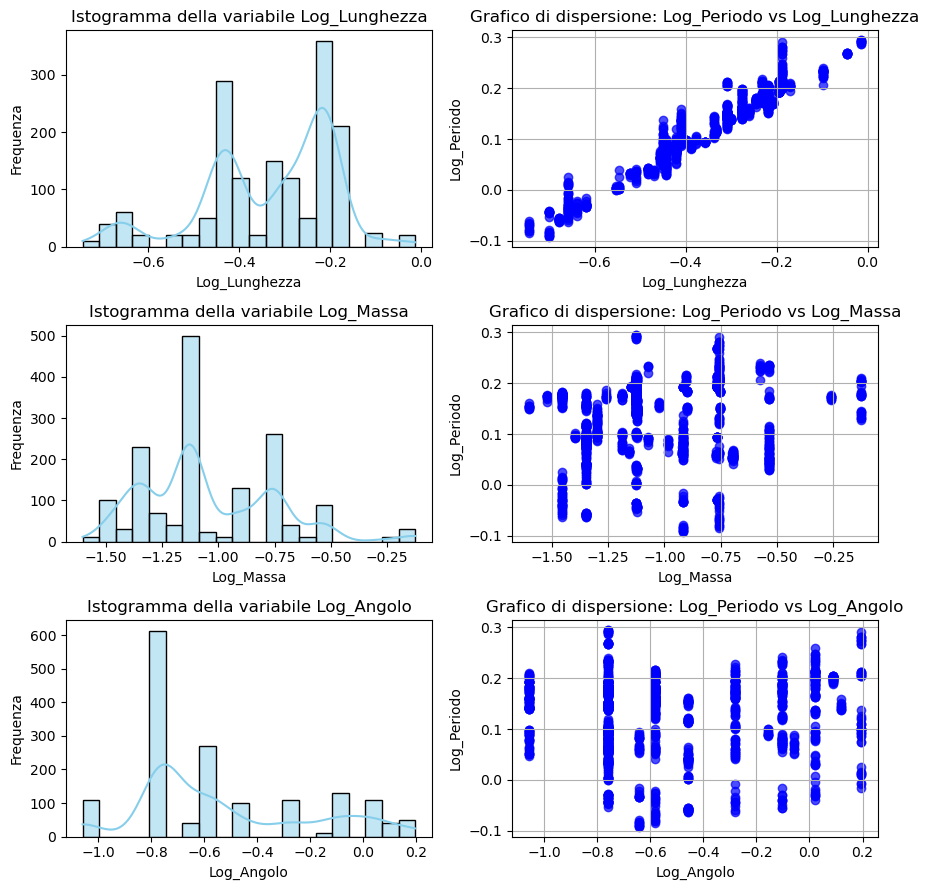

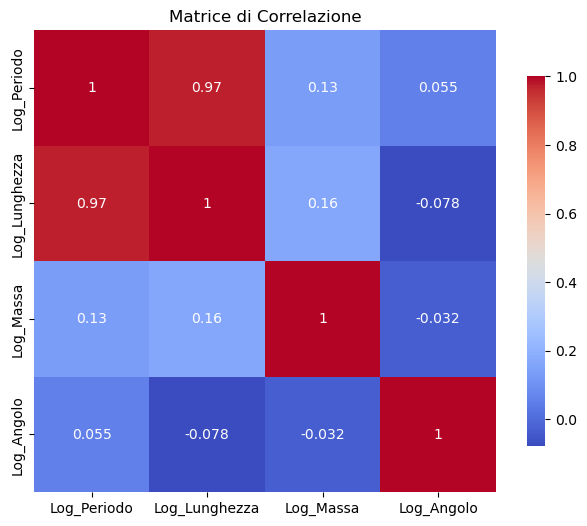

In [98]:
fig, axes = plt.subplots(3, 2, figsize=(9, 9))

sns.histplot(df['Log_Lunghezza'], bins=20, kde=True, color='skyblue', ax=axes[0,0])
axes[0,0].set_xlabel('Log_Lunghezza')
axes[0,0].set_ylabel('Frequenza')
axes[0,0].set_title('Istogramma della variabile Log_Lunghezza')

axes[0,1].scatter(df['Log_Lunghezza'], df['Log_Periodo'], color='b', alpha=0.7)
axes[0,1].set_xlabel('Log_Lunghezza')
axes[0,1].set_ylabel('Log_Periodo')
axes[0,1].set_title('Grafico di dispersione: Log_Periodo vs Log_Lunghezza')
axes[0,1].grid(True)


sns.histplot(df['Log_Massa'], bins=20, kde=True, color='skyblue', ax=axes[1,0])
axes[1,0].set_xlabel('Log_Massa')
axes[1,0].set_ylabel('Frequenza')
axes[1,0].set_title('Istogramma della variabile Log_Massa')

axes[1,1].scatter(df['Log_Massa'], df['Log_Periodo'], color='b', alpha=0.7)
axes[1,1].set_xlabel('Log_Massa')
axes[1,1].set_ylabel('Log_Periodo')
axes[1,1].set_title('Grafico di dispersione: Log_Periodo vs Log_Massa')
axes[1,1].grid(True)


sns.histplot(df['Log_Angolo'], bins=20, kde=True, color='skyblue', ax=axes[2,0])
axes[2,0].set_xlabel('Log_Angolo')
axes[2,0].set_ylabel('Frequenza')
axes[2,0].set_title('Istogramma della variabile Log_Angolo')

axes[2,1].scatter(df['Log_Angolo'], df['Log_Periodo'], color='b', alpha=0.7)
axes[2,1].set_xlabel('Log_Angolo')
axes[2,1].set_ylabel('Log_Periodo')
axes[2,1].set_title('Grafico di dispersione: Log_Periodo vs Log_Angolo')
axes[2,1].grid(True)


plt.tight_layout()
plt.show()


# Calcola la matrice di correlazione
correlation_matrix = df[['Log_Periodo', 'Log_Lunghezza', 'Log_Massa', 'Log_Angolo']].corr()

# Visualizza la matrice di correlazione con una heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title("Matrice di Correlazione")
plt.show()

Pendenza: 0.509 ± 0.002
Intercetta: 0.292 ± 0.001


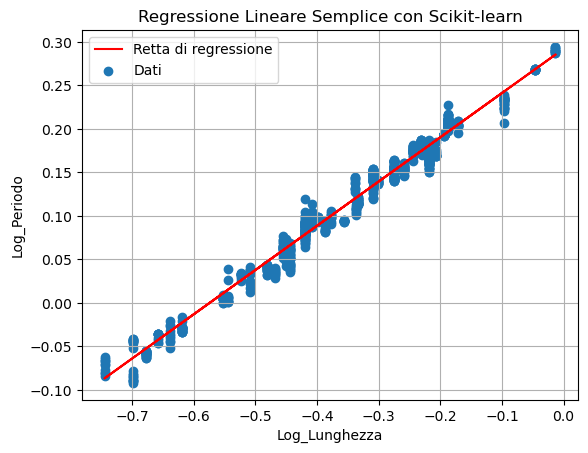

In [106]:
from sklearn.linear_model import LinearRegression
import numpy as np

filtered_df = df[df['Angolo (deg)'] <= 20]
X = filtered_df['Log_Lunghezza'].values.reshape(-1, 1)
y = filtered_df['Log_Periodo'].values

import statsmodels.api as sm

# Aggiungi una costante per l'intercetta
X = sm.add_constant(X)  # Aggiunge una colonna di 1 per calcolare l'intercetta
model = sm.OLS(y, X)    # Crea il modello di regressione lineare
results = model.fit()    # Adatta il modello ai dati

# Ottieni i risultati
slope = results.params[1]
intercept = results.params[0]
slope_error = results.bse[1]
intercept_error = results.bse[0]

# Stampa i risultati
print(f"Pendenza: {slope:.3f} ± {slope_error:.3f}")
print(f"Intercetta: {intercept:.3f} ± {intercept_error:.3f}")

# Linea di regressione
X = filtered_df['Log_Lunghezza'].values.reshape(-1, 1)
y_regression = slope * X + intercept

# Linee degli errori
y_upper = (slope + slope_error) * X + intercept+intercept_error
y_lower = (slope - slope_error) * X + intercept-intercept_error

# Plot dei dati e della linea di regressione
plt.scatter(X, y, label='Dati')
plt.plot(X, y_regression, color='red', label='Retta di regressione')

plt.title('Regressione Lineare Semplice con Scikit-learn')
plt.xlabel('Log_Lunghezza')
plt.ylabel('Log_Periodo')
plt.legend()
plt.grid(True)
plt.show()


Pendenza: 0.509 ± 0.002
Intercetta: 0.292 ± 0.001


Pendenza: 0.509 ± 0.002
Intercetta: 0.292 ± 0.001
